In [1]:
#import the necessary libbary for the project
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap 

In [2]:
#Get the file from Kaggle directory. 
#This dat ais public and realted infor about dataset can be found in the page below.
#kaggle datasets link - https://www.kaggle.com/search?q=MTA+Subway+Hourly+Ridership+2022
df = pd.read_csv('/kaggle/input/mta-subway-hourly-ridership-2022/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv')
df.head()

/tmp/ipykernel_32/4263652677.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/mta-subway-hourly-ridership-2022/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv')


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,06/24/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,19,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-06-24T04:00:00H0071 Av (L)MLomny
1,07/05/2022 10:00:00 PM,H007,1 Av (L),M,L,omny,229,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-07-05T22:00:00H0071 Av (L)MLomny
2,08/30/2022 03:00:00 AM,H007,1 Av (L),M,L,omny,5,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-30T03:00:00H0071 Av (L)MLomny
3,11/05/2022 03:00:00 AM,H007,1 Av (L),M,L,omny,78,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-11-05T03:00:00H0071 Av (L)MLomny
4,01/19/2023 04:00:00 AM,H007,1 Av (L),M,L,omny,5,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-01-19T04:00:00H0071 Av (L)MLomny


Some critical data info for this analysis

* **transit_timestamp** : Timestamp payment took place in local time. All transactions here are rounded down to the nearest hour. For example, a swipe that took place at 1:37pm will be reported as having taken place at 1pm.

* **station_complex_id** : A unique identifier for station complexes

* **ridership** : Total number of riders that entered a subway complex via OMNY or MetroCard at the specific hou

In [3]:
#Checking the null datas. 
df.isnull().sum()

transit_timestamp     0
station_complex_id    0
station_complex       0
borough               0
routes                0
payment_method        0
ridership             0
transfers             0
latitude              0
longitude             0
Georeference          0
itsuid                0
dtype: int64

In [4]:
#checking the duplicate columns and drop to unneccessary columns
df.drop_duplicates(inplace=True)
df_1 = df.copy()
df_1.drop(columns =['borough','payment_method','routes','Georeference','itsuid','transfers'],inplace = True)
df_1.head()

,transit_timestamp,station_complex_id,station_complex,ridership,latitude,longitude
0,06/24/2022 04:00:00 AM,H007,1 Av (L),19,40.730953,-73.981628
1,07/05/2022 10:00:00 PM,H007,1 Av (L),229,40.730953,-73.981628
2,08/30/2022 03:00:00 AM,H007,1 Av (L),5,40.730953,-73.981628
3,11/05/2022 03:00:00 AM,H007,1 Av (L),78,40.730953,-73.981628
4,01/19/2023 04:00:00 AM,H007,1 Av (L),5,40.730953,-73.981628


In [5]:
#Checking the data types in the dataset.
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11724911 entries, 0 to 11724910
Data columns (total 6 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   ridership           int64  
 4   latitude            float64
 5   longitude           float64
dtypes: float64(2), int64(1), object(3)
memory usage: 536.7+ MB


In [6]:
#Checking the size of the dataset
df_1.shape

(11724911, 6)

In [7]:
#Creating extra columns which we will use in further analysis.
df_1['transit_timestamp'] = pd.to_datetime(df_1['transit_timestamp'])
df_1['month_name'] = df_1['transit_timestamp'].dt.month_name()
df_1['month_number'] = df_1['transit_timestamp'].dt.month
df_1['day_name'] =  df_1['transit_timestamp'].dt.day_name()
df_1['time_slot'] = pd.to_datetime(df_1['transit_timestamp']).dt.hour
df_1['year'] = pd.to_datetime(df_1['transit_timestamp']).dt.year
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11724911 entries, 0 to 11724910
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   transit_timestamp   datetime64[ns]
 1   station_complex_id  object        
 2   station_complex     object        
 3   ridership           int64         
 4   latitude            float64       
 5   longitude           float64       
 6   month_name          object        
 7   month_number        int32         
 8   day_name            object        
 9   time_slot           int32         
 10  year                int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 849.8+ MB


In [8]:
df_1.head()

,transit_timestamp,station_complex_id,station_complex,ridership,latitude,longitude,month_name,month_number,day_name,time_slot,year
0,2022-06-24 04:00:00,H007,1 Av (L),19,40.730953,-73.981628,June,6,Friday,4,2022
1,2022-07-05 22:00:00,H007,1 Av (L),229,40.730953,-73.981628,July,7,Tuesday,22,2022
2,2022-08-30 03:00:00,H007,1 Av (L),5,40.730953,-73.981628,August,8,Tuesday,3,2022
3,2022-11-05 03:00:00,H007,1 Av (L),78,40.730953,-73.981628,November,11,Saturday,3,2022
4,2023-01-19 04:00:00,H007,1 Av (L),5,40.730953,-73.981628,January,1,Thursday,4,2023


In [9]:
#creating a table to see monthly and yearly total ridership. 
df_monthly = df_1.groupby(['year','month_name','month_number'])['ridership'].sum().reset_index().sort_values('month_number', ascending = True )
df_monthly

,year,month_name,month_number,ridership
14,2023,January,1,89600490
3,2022,February,2,64708756
13,2023,February,2,85023767
17,2023,March,3,101815261
6,2022,March,3,87803876
0,2022,April,4,83770606
11,2023,April,4,94739664
7,2022,May,5,88205695
18,2023,May,5,105081959
5,2022,June,6,88446874


In [10]:
#converting number to 2 digits to show in millions.
df_monthly['ridership'] =df_monthly['ridership'] / 1e6

In [11]:
df_monthly

,year,month_name,month_number,ridership
14,2023,January,1,89.600490
3,2022,February,2,64.708756
13,2023,February,2,85.023767
17,2023,March,3,101.815261
6,2022,March,3,87.803876
0,2022,April,4,83.770606
11,2023,April,4,94.739664
7,2022,May,5,88.205695
18,2023,May,5,105.081959
5,2022,June,6,88.446874


In [12]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 14 to 2
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          20 non-null     int32  
 1   month_name    20 non-null     object 
 2   month_number  20 non-null     int32  
 3   ridership     20 non-null     float64
dtypes: float64(1), int32(2), object(1)
memory usage: 640.0+ bytes


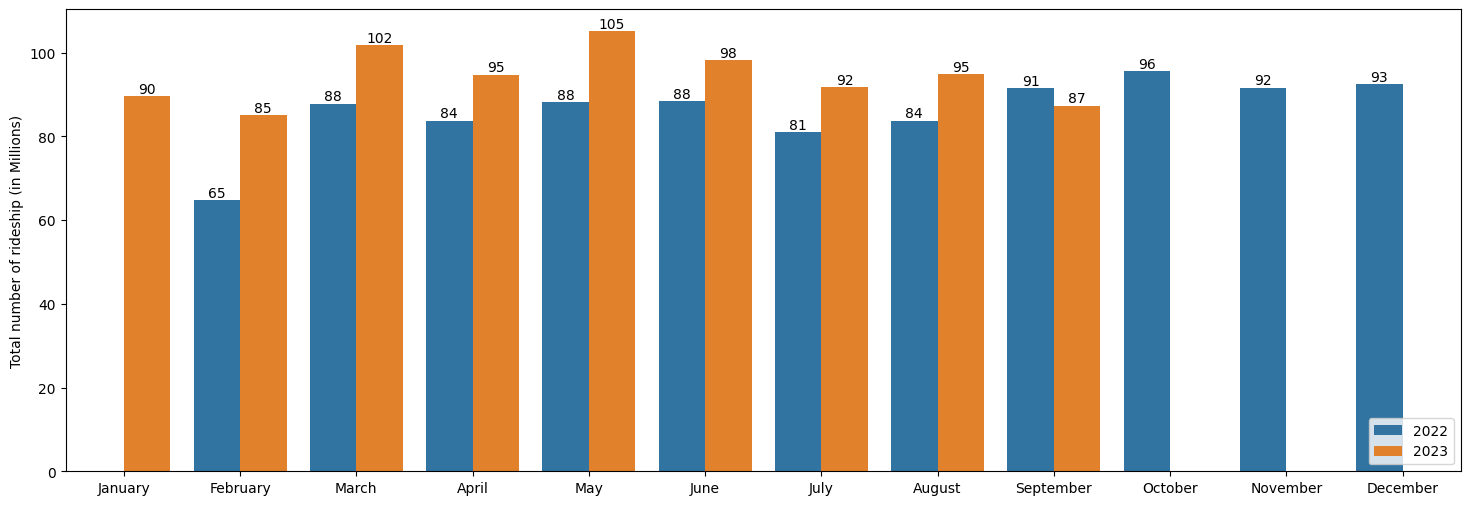

In [13]:
# defining the size of the graph
plt.figure(figsize=[18,6])
# Draw the barplat by years and months.
sns.color_palette("husl", 8)
ax = sns.barplot(df_monthly, x='month_name', y='ridership', hue='year')
ax.bar_label(ax.containers[0],fmt='%.0f', fontsize=10)
ax.bar_label(ax.containers[1],fmt='%.0f', fontsize=10)
plt.legend(loc='lower right')
# renaming the axes
ax.set(xlabel="" , ylabel="Total number of rideship (in Millions)");

In [14]:
#Limiting the dataset to May 2023 to find the best station and time. 
df_may = df_1[(df_1['transit_timestamp'] > '2023-04-30 23:59:59') & (df_1['transit_timestamp'] < '2023-06-01 00:00:00')] 
df_may['day_number'] = df_may['transit_timestamp'].dt.day
df_may.head()

/tmp/ipykernel_32/3308031977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_may['day_number'] = df_may['transit_timestamp'].dt.day


,transit_timestamp,station_complex_id,station_complex,ridership,latitude,longitude,month_name,month_number,day_name,time_slot,year,day_number
71,2023-05-10 22:00:00,R252,103 St (6),35,40.790600,-73.947479,May,5,Wednesday,22,2023,10
72,2023-05-20 03:00:00,R252,103 St (6),1,40.790600,-73.947479,May,5,Saturday,3,2023,20
73,2023-05-21 22:00:00,R252,103 St (6),38,40.790600,-73.947479,May,5,Sunday,22,2023,21
102,2023-05-09 03:00:00,R529,103 St-Corona Plaza (7),9,40.749866,-73.862701,May,5,Tuesday,3,2023,9
122,2023-05-14 04:00:00,J034,"104 St (J,Z)",4,40.695179,-73.844330,May,5,Sunday,4,2023,14


In [15]:
# Checking the min and max times for May 2023.
print(df_may['transit_timestamp'].min())
print(df_may['transit_timestamp'].max())

2023-05-01 00:00:00
2023-05-31 23:00:00


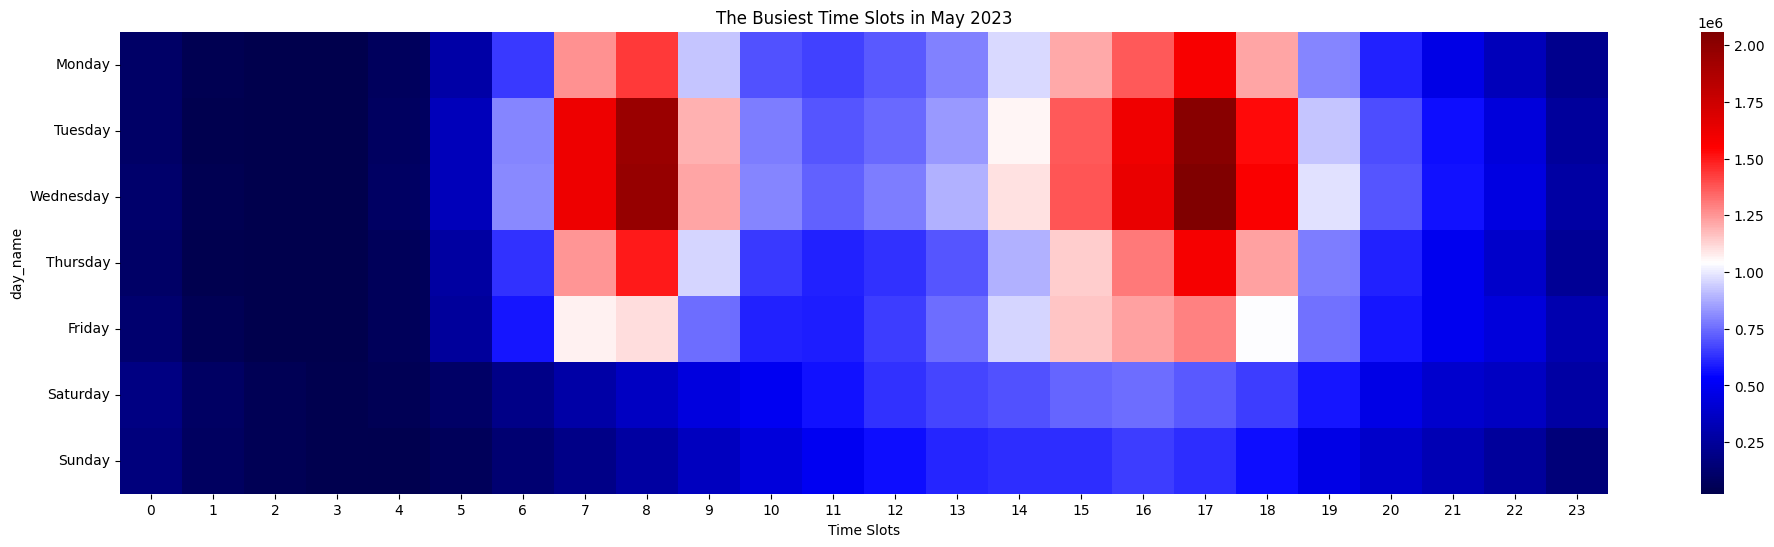

In [16]:
# drawing a heat map to find the busiest day / days and time slot / time slots. 
plt.figure(figsize=[24,6])
df_time_slot_heat_map = df_may.pivot_table( index='day_name', columns='time_slot', values='ridership', aggfunc='sum')
logical_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_time_slot_heat_map = df_time_slot_heat_map.loc[logical_order]
sns.heatmap(df_time_slot_heat_map,cmap="seismic", annot=False)
plt.xlabel('Time Slots')  # Label for the x-axis
plt.title('The Busiest Time Slots in May 2023')
plt.show();

In [17]:
# Filtering the dataset to take a look at on Tuesdays and Wednesdyas. 
df_may = df_may[(df_may['day_name'] == 'Wednesday') | (df_may['day_name'] == 'Tuesday')]
df_may = df_may[((df_may['time_slot'] >= 16) & df_may['time_slot'] <= 18)]
df_may.drop(columns = ['month_name','month_number'], inplace = True )
df_may.head()

,transit_timestamp,station_complex_id,station_complex,ridership,latitude,longitude,day_name,time_slot,year,day_number
71,2023-05-10 22:00:00,R252,103 St (6),35,40.790600,-73.947479,Wednesday,22,2023,10
102,2023-05-09 03:00:00,R529,103 St-Corona Plaza (7),9,40.749866,-73.862701,Tuesday,3,2023,9
159,2023-05-24 00:00:00,R254,110 St (6),10,40.795021,-73.944252,Wednesday,0,2023,24
180,2023-05-24 19:00:00,R530,111 St (7),53,40.751732,-73.855331,Wednesday,19,2023,24
230,2023-05-09 02:00:00,R302,"116 St (2,3)",1,40.802097,-73.949623,Tuesday,2,2023,9


In [18]:
# Filtering the busiest station on Tuesdays and Wednesdyas. 
df_may_station = df_may.groupby(['station_complex_id','station_complex','latitude','longitude']).sum(['ridership']).sort_values('ridership', ascending  = False ).reset_index()
df_may_station_top_ten = df_may_station.head(10)
df_may_station_top_ten

,station_complex_id,station_complex,latitude,longitude,ridership,time_slot,year,day_number
0,N060,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",40.757309,-73.981964,1819083,5520,971040,7920
1,R238,"Grand Central-42 St (S,4,5,6,7)",40.751778,-73.976845,1107767,5520,971040,7920
2,A022,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",40.749718,-73.987823,783324,5520,971040,7920
3,A034,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",40.735737,-73.989952,706499,5520,971040,7920
4,N095,"Fulton St (A,C,J,Z,2,3,4,5)",40.710373,-74.006569,642875,5520,971040,7920
5,N070,"34 St-Penn Station (A,C,E)",40.752289,-73.993393,562618,5520,971040,7920
6,N049,"59 St-Columbus Circle (A,B,C,D,1)",40.768295,-73.981735,531589,5520,971040,7920
7,R135,"34 St-Penn Station (1,2,3)",40.750374,-73.991058,522788,5520,971040,7920
8,R533,Flushing-Main St (7),40.759602,-73.830032,467461,5520,971040,7920
9,R525,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",40.746849,-73.891335,457054,5520,971040,7920


In [19]:
# Highlighting the top ten station on map.
map_center = [df_may_station_top_ten['latitude'].mean(), df_may_station_top_ten['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each location
for index, row in df_may_station_top_ten.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Station ID: {row['station_complex']}<br>Ranking: {row['ridership']}",
        icon=folium.Icon(color='red',
        tooltip=f"Index: {index}")).add_to(m)

m.save('index_map.html')
m

In [20]:
# Highlighting the top ten station on map in a heat map format.

from folium.plugins import HeatMap

# Create a Folium map centered at an average location
map_center = [40.75, -73.98]  # You can adjust this based on your data
heat_map = folium.Map(location=map_center, zoom_start=12)

# Prepare the data for the HeatMap
heat_data = [[row['latitude'], row['longitude'], row['ridership']] for index, row in df_may_station.iterrows()]


# Add the HeatMap layer to the map
HeatMap(heat_data, radius=15).add_to(heat_map)

heat_map.save('heat.html')
heat_map

In [21]:
#finding the busiest top tens station on Tuesdays and Wednesdays in May 2023
df_may_peak= df_may.groupby(['day_number','station_complex','station_complex_id']).sum(['ridership']).sort_values('ridership', ascending  = False ).reset_index()
df_may_peak.head(10)

,day_number,station_complex,station_complex_id,ridership,latitude,longitude,time_slot,year
0,17,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,192578,1956.35083,-3551.134277,552,97104
1,3,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,187945,1956.35083,-3551.134277,552,97104
2,31,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,183590,1956.35083,-3551.134277,552,97104
3,24,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,183581,1956.35083,-3551.134277,552,97104
4,10,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,181639,1956.35083,-3551.134277,552,97104
5,16,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,181560,1956.35083,-3551.134277,552,97104
6,2,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,180190,1956.35083,-3551.134277,552,97104
7,23,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,178867,1956.35083,-3551.134277,552,97104
8,9,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,177214,1956.35083,-3551.134277,552,97104
9,30,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,171919,1956.35083,-3551.134277,552,97104


In [22]:
#finding the 10 ten busiest day for Times Sq
df_may_peak.drop(columns = ['latitude','longitude','time_slot','year','station_complex','station_complex_id'], inplace = True)
df_may_peak_top_ten_st = df_may_peak.head(10) 
df_may_peak_top_ten_st.sort_values(by='ridership',ascending = False)

,day_number,ridership
0,17,192578
1,3,187945
2,31,183590
3,24,183581
4,10,181639
5,16,181560
6,2,180190
7,23,178867
8,9,177214
9,30,171919
